In [1]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
plt.rc("figure", figsize=(15,8))

In [5]:
df = pd.read_csv("mic8-array1 - Sheet1.csv")

In [6]:
df.head()

,Freq,Channel 1,Average
0,0.00,-95.91,-95.91
1,0.73,-96.63,-96.63
2,1.46,-92.25,-92.25
3,2.20,-87.12,-87.12
4,2.93,-84.11,-84.11


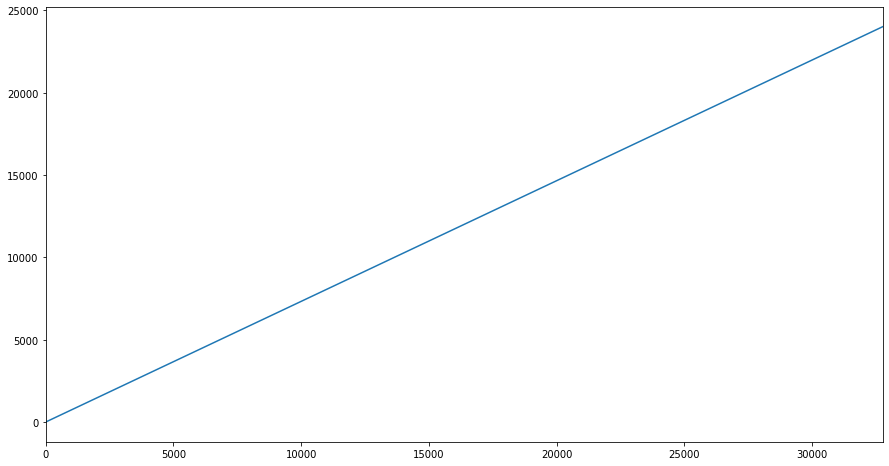

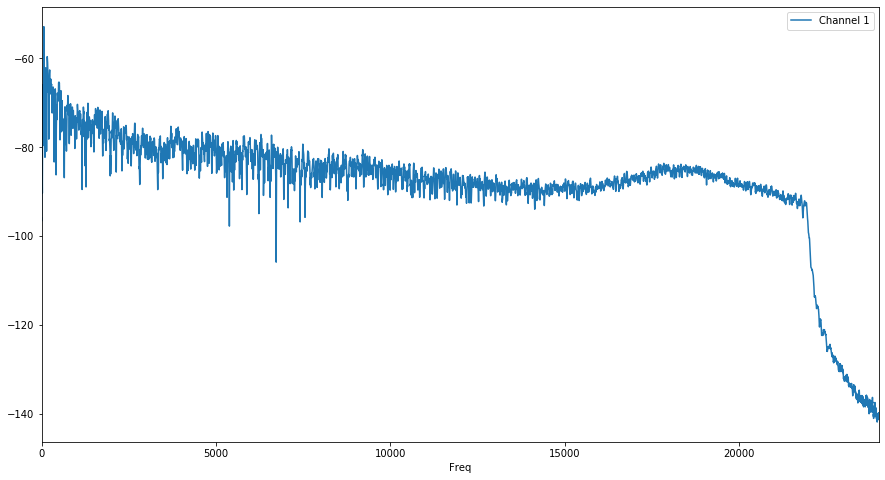

In [7]:
df["Freq"].plot()
#df["Average"].plot()
df.plot(x = "Freq", y = "Channel 1" )
plt.legend();

In [8]:
#subtrack best candidate from mics and plot response - high frequencies should show some variations

In [9]:
#create tolerance curves - best candidate from all other mics tolerance thresholds, consult Bea and Magda if we vary frequency content how much will it impact ML models



In [45]:
mic_files = {
    'mic 1': "mic1-array1 - Sheet1.csv",
    'mic 2': "mic2-array1 - Sheet1.csv",
    'mic 3': "mic3-array1 - Sheet1.csv",
    'mic 4': "mic4-array1 - Sheet1.csv",
    'mic 5': "mic5-array1 - Sheet1.csv",
    'mic 6': "mic6-array1 - Sheet1.csv",
    'mic 7': "mic7-array1 - Sheet1.csv",
}

def load_mic_csv(f):
    return pd.read_csv(f).set_index('Freq', drop=False).rename(columns={'Channel 1': 'Ch1'})

dfs = {
    name: load_mic_csv(f)
    for name, f in mic_files.items()
}
# df = pd.read_csv("mic1-array1 - Sheet1.csv")
# df = pd.read_csv("mic2-array1 - Sheet1.csv")
{n: df.shape for n, df in dfs.items()}, {n: df.columns for n, df in dfs.items()}

({'mic 1': (32768, 3),
  'mic 2': (32768, 3),
  'mic 3': (32768, 3),
  'mic 4': (32768, 3),
  'mic 5': (32768, 3),
  'mic 6': (32768, 3),
  'mic 7': (32768, 3)},
 {'mic 1': Index(['Freq', 'Ch1', 'Average'], dtype='object'),
  'mic 2': Index(['Freq', 'Ch1', 'Average'], dtype='object'),
  'mic 3': Index(['Freq', 'Ch1', 'Average'], dtype='object'),
  'mic 4': Index(['Freq', 'Ch1', 'Average'], dtype='object'),
  'mic 5': Index(['Freq', 'Ch1', 'Average'], dtype='object'),
  'mic 6': Index(['Freq', 'Ch1', 'Average'], dtype='object'),
  'mic 7': Index(['Freq', 'Ch1', 'Average'], dtype='object')})

In [46]:
dfs['mic 1'].head()

,Freq,Ch1,Average
Freq,,,
0.00,0.00,-116.22,-116.22
0.73,0.73,-116.04,-116.04
1.46,1.46,-116.09,-116.09
2.20,2.20,-115.46,-115.46
2.93,2.93,-115.57,-115.57


//anaconda3/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
//anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


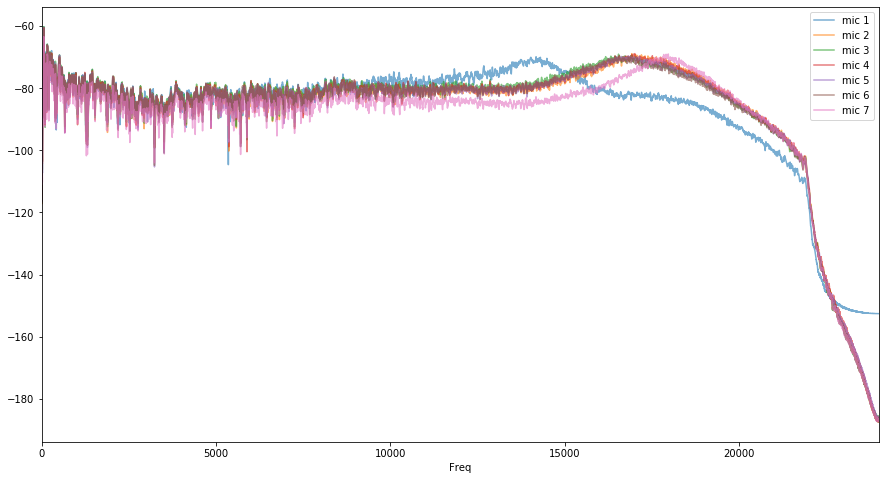

In [47]:
#df["Freq"].plot()
#df["Average"].plot()
# df.plot(x = "Freq", y = "Channel 1" )
# df.plot(x = "Freq", y = "Channel 1" )
for name, df in dfs.items():
    df.Ch1.plot(label=name, alpha=0.6)
#plt.ylim([-100, None])
plt.legend();

In [52]:
df_ref = load_mic_csv("mic8-array1 - Sheet1.csv")
print(df_ref.shape)
df_ref.head()

(32768, 3)


,Freq,Ch1,Average
Freq,,,
0.00,0.00,-95.91,-95.91
0.73,0.73,-96.63,-96.63
1.46,1.46,-92.25,-92.25
2.20,2.20,-87.12,-87.12
2.93,2.93,-84.11,-84.11


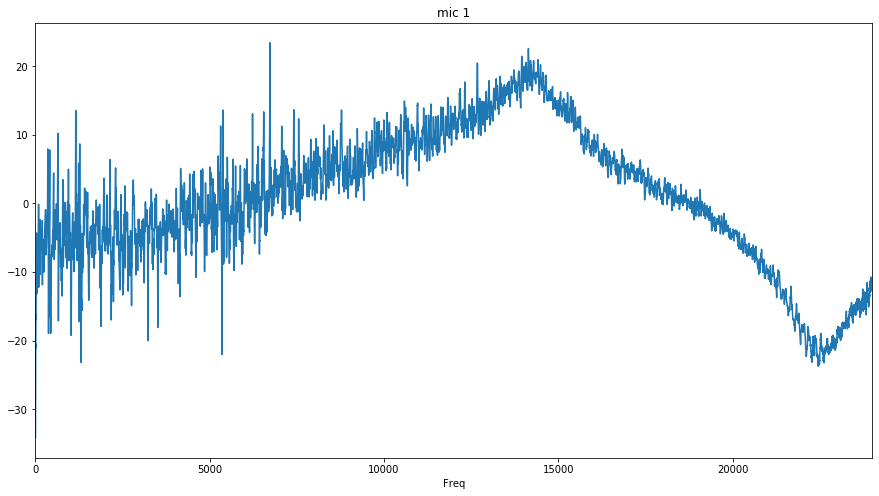

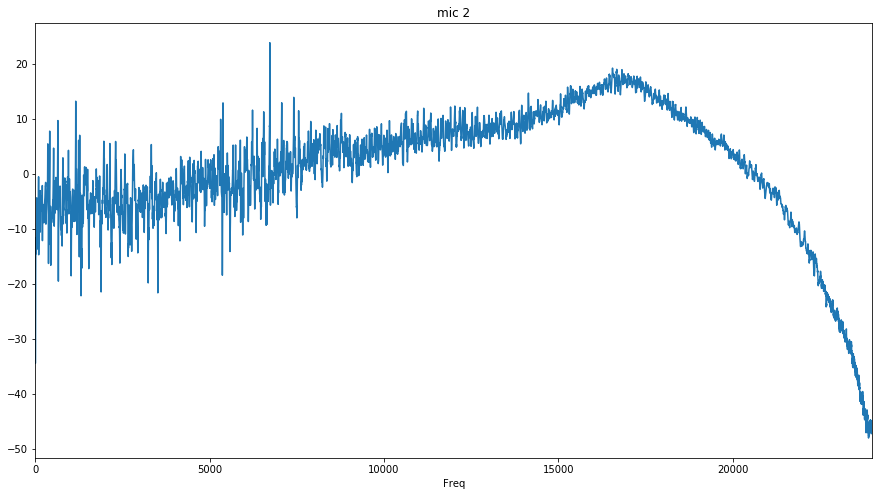

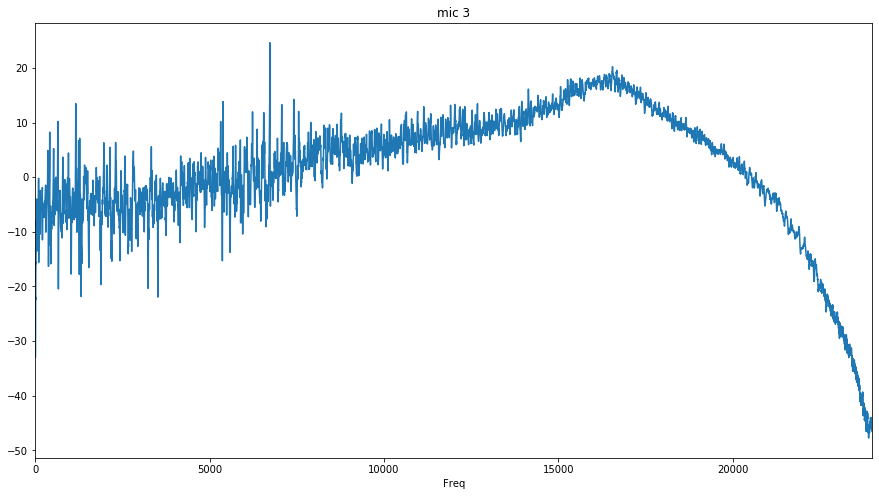

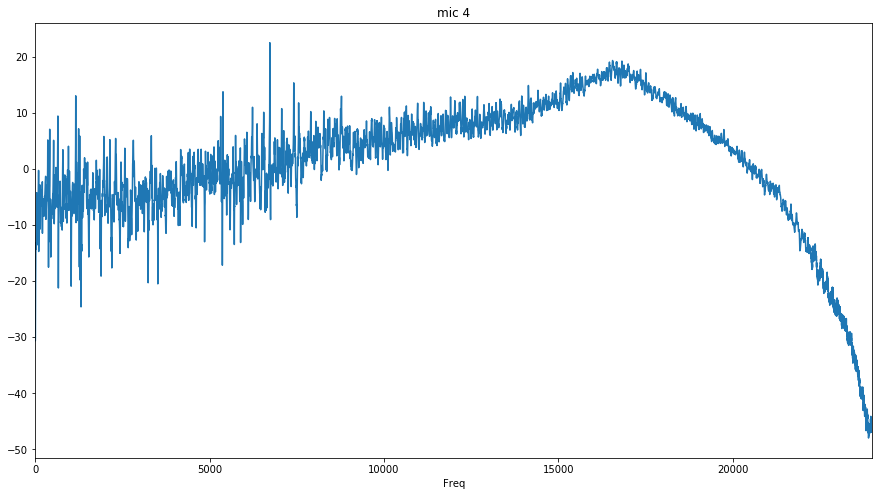

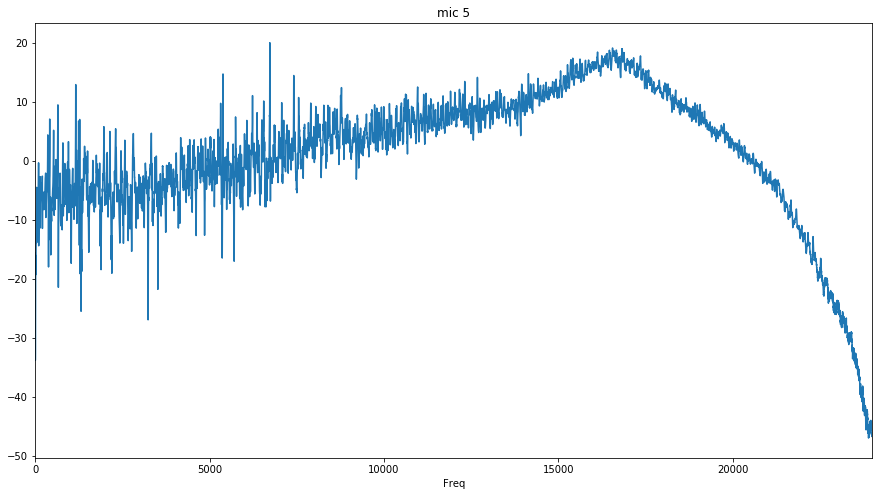

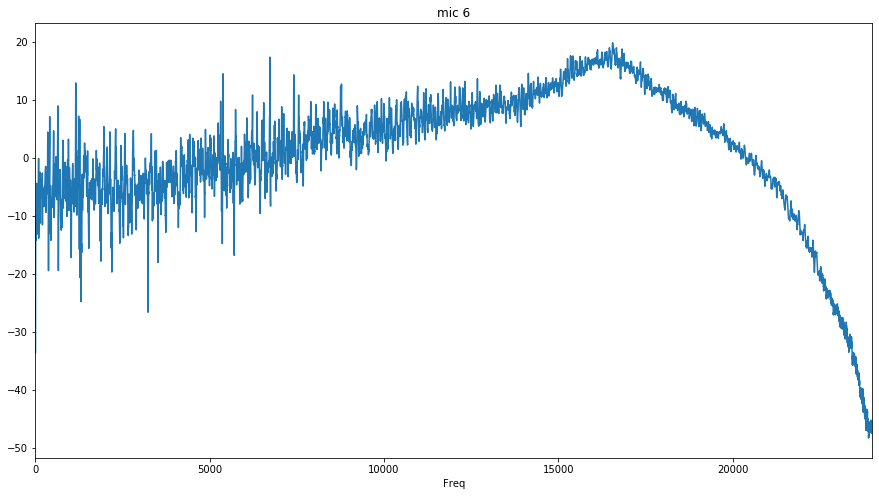

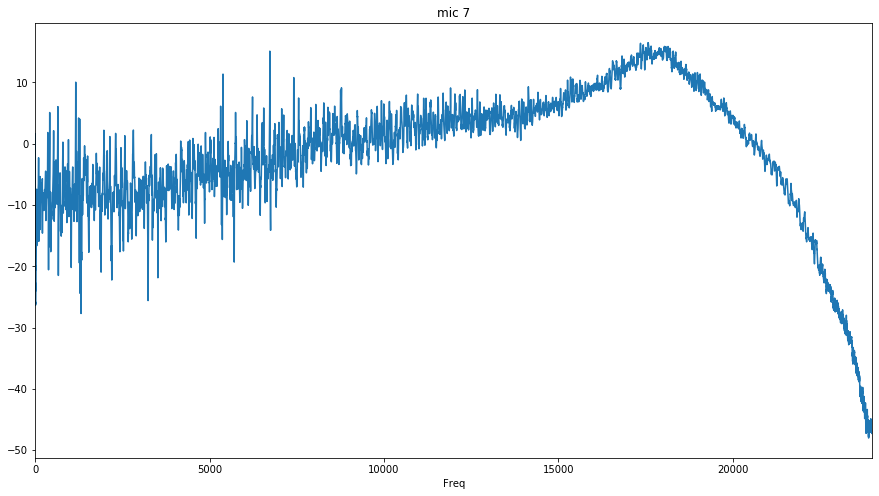

In [53]:
for name, df in dfs.items():
    (df.Ch1 - df_ref.Ch1).plot()
    plt.title(name)
    plt.show()

Text(0.5, 1.0, 'mic 3 - mic 4')

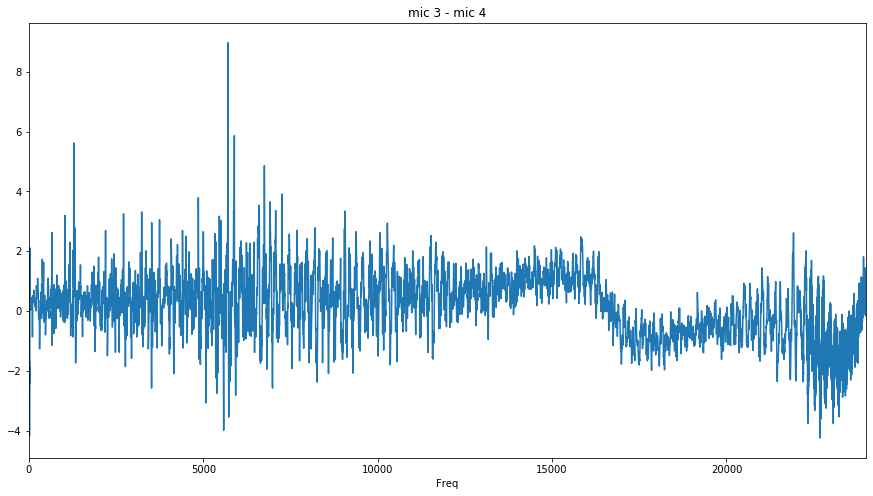

In [50]:
(dfs['mic 3'].Ch1 - dfs['mic 4'].Ch1).plot()
plt.title('mic 3 - mic 4')

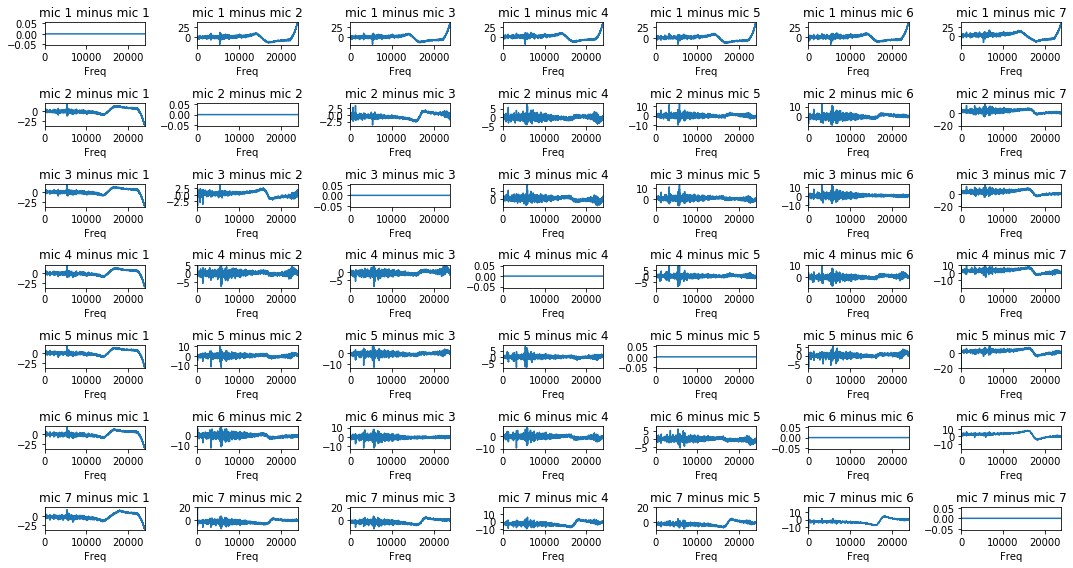

In [51]:
for i, (name_i, dfi) in enumerate(dfs.items()):
    for j, (name_j, dfj) in enumerate(dfs.items()):
        plt.subplot(len(dfs), len(dfs), 1 + i * len(dfs) + j)
        (dfi.Ch1 - dfj.Ch1).plot()
        plt.title(f'{name_i} minus {name_j}')
plt.tight_layout()